# 主成分分析（乳がんデータ分析）



* 設定
 - 乳がん検査データを利用しロジスティック回帰モデルを作成
 - 主成分を利用し2次元空間上に次元圧縮
* 課題
 - 32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認  


 データセット名 |    乳がん検査      
 --- | ---  
 データレコード数 | 569  
 カラム数 | 33  
 詳細 | scikit learn


In [ ]:
#https://ohke.hateblo.jp/entry/2017/08/11/230000を参考に利用しています。

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [ ]:
cancer_df = pd.read_csv('/content/drive/My Drive/study_ai_ml/data/cancer.csv')

In [ ]:
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [ ]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


・diagnosis: 診断結果 (良性がB / 悪性がM)  
・説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [ ]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [ ]:
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]

30次元のデータを全部を使用してまず、ロジスティック回帰（10分割交差検証）で判別をする。
* 主成分分析による次元圧縮は未実施


In [ ]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


・検証スコア97%で分類できることを確認

## 寄与率の表示

<BarContainer object of 30 artists>

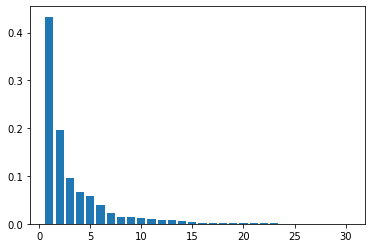

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

* 30次元のデータを我々が目で見える次元、2次元や3次元に落としたいと考えた時に、主成分分析を使用する事ができる。  
* 問題はどこまで情報が落ちてしまうかを定量的に測らなければいけない。  
 - それを測る指標として「寄与率」がある。  
 - この30次元のデータを30個の主成分で次元圧縮した時にそれぞれの軸が持つ情報量はどれくらいあるかを表したのが上のグラフになる。  
 - 30次元のデータを2次元に落としたとしても、65%くらい（第1主成分で43%、第2主成分で20%）は情報を維持しているのではないかと考えられる。

# 主成分分析による次元数２までの圧縮

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

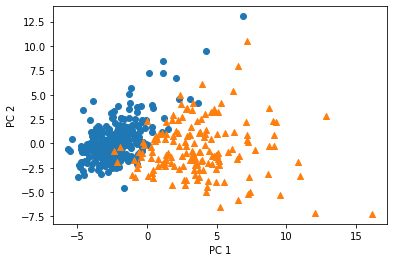

In [ ]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

* 2次元に落とすとその境界があいまいになっているのが分かる。  
 - 97%分類できるという事は3%しか間違えない。しっかりと分類できていたはずだった。  
 - 2次元に落としたところ、65%くらいしか情報を維持していないため、ある程度まで決定境界があいまいになってしまった。  

In [ ]:
# パイプラインの作成
from sklearn.pipeline import Pipeline

pca_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('decomposition', PCA(n_components=2)),
    ('model', LogisticRegressionCV(cv=10, random_state=0))
])

# 標準化・次元圧縮・学習
pca_pipeline.fit(X_train, y_train)

# 検証
print('Train score: {:.3f}'.format(pca_pipeline.score(X_train, y_train)))
print('Test score: {:.3f}'.format(pca_pipeline.score(X_test, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=pca_pipeline.predict(X_test))))

Train score: 0.965
Test score: 0.937
Confustion matrix:
[[84  6]
 [ 3 50]]


* 2次元に圧縮したデータに決定境界を引いてみる。  
 - テストデータの精度で94%となり、全ての説明変数を使った場合と比較して約3.5ポイントしか落としていない。
 - 30次元から2次元まで圧縮したにもかかわらず、期待を大きく上回る精度が得られたように思われる。

model intercept: [-0.30694316]
model coef : [[ 1.78050858 -0.92218849]]
y = x*1.930742578571047 + -0.3328421076224522


Text(0, 0.5, 'PC 2')

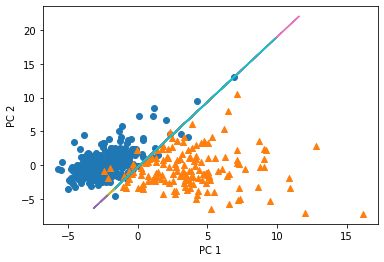

In [ ]:
# 切片と傾き
intercept = pca_pipeline.steps[2][1].intercept_
coef = pca_pipeline.steps[2][1].coef_
print('model intercept: {}'.format(intercept))
print('model coef : {}'.format(coef))
# model intercept: [-0.30694316]
# model : [[ 1.78050858 -0.92218849]]

# 決定境界をプロット
plt.plot(X_train_scaled, -(X_train_scaled*coef[0][0] + intercept[0])/coef[0][1])
print('y = x*{} + {}'.format(-coef[0][0]/coef[0][1], -intercept[0]/coef[0][1]))
# y = x*1.9307425768880175 + -0.332842107288895

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸